In [249]:
import pandas as pd
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter

In [250]:
data = pd.read_excel("title_author_uni_country_sql.xlsx")

Between the years 2003 and 2021, keywords were present in around 50% of the paper

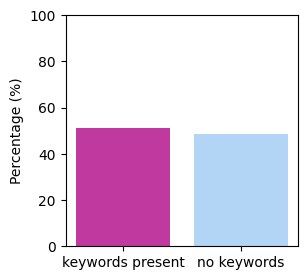

In [251]:
titles = data.groupby('title').agg({
    'author': list,
    'country': list,
    'university': list,
    'keywords_dummi': 'first',
    'keywords': 'first',  
    'year': 'first'      
}).reset_index()
 
kw_yes = (titles['keywords_dummi'] == 1).sum() / len(titles) * 100
kw_no = (titles['keywords_dummi'] == 0).sum() / len(titles) * 100

plt.figure(figsize=(3, 3))
plt.bar(['keywords present', 'no keywords'], [kw_yes, kw_no], color=['#BF399E', '#b2d4f5'])
plt.xlabel('')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)  
plt.show()

There is a positive trend in the presence of the 'Keywords' section in papers over the years: 20% only in 2004 and increasing to 75% in 2021

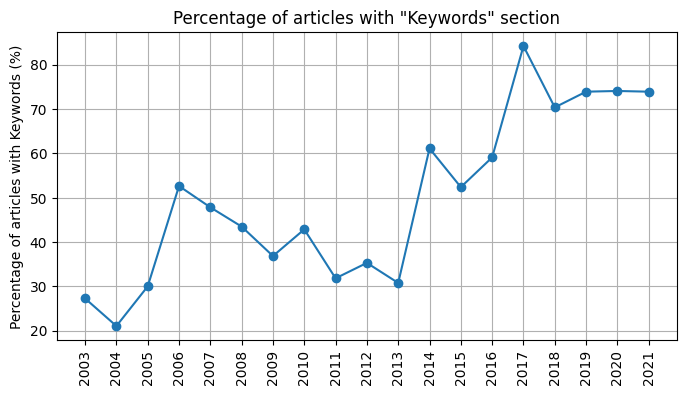

In [252]:
titles_year = titles.groupby('year')
keywords_year = (titles_year['keywords_dummi'].sum() / titles_year['year'].count()) * 100

plt.figure(figsize=(8, 4))
plt.plot(keywords_year.index, keywords_year.values, marker='o', linestyle='-')
#plt.xlabel('Year')
plt.ylabel('Percentage of articles with Keywords (%)')
plt.title('Percentage of articles with "Keywords" section')
plt.xticks(keywords_year.index, rotation=90)
plt.grid(True)
plt.show()

There are a total of 598 unique keywords or keyword phrases found over the course of 19 years

In [253]:
keywords = titles['keywords'].str.split(',').explode().str.strip()
keywords = keywords.str.replace('\n', ' ', regex=False).str.replace('\t', ' ', regex=False).str.replace('.', '', regex=False)
keywords = keywords.str.lower()
keywords = keywords.dropna()

# There are 2 keywords where keeping a dot is neccessary
keywords = keywords.replace({'bpmn 20': 'bpmn 2.0', 'industry 40': 'industry 4.0'})
keywords = keywords.reset_index(drop=True)

# Get unique keywords and their frequencies
unique_keywords = keywords.unique()
unique_kw_number = len(unique_keywords)
print(f"Unique keywords number: {unique_kw_number}")

keyword_frequencies = keywords.value_counts().reset_index()
keyword_frequencies.columns = ['Keyword', 'Frequency']
print(keyword_frequencies.head(17))
keyword_frequencies.to_excel('keyword_frequencies.xlsx', index=False)

Unique keywords number: 598
                                         Keyword  Frequency
0                                 process mining         52
1                    business process management         16
2                           conformance checking         12
3                                     petri nets         12
4                      business process modeling         11
5                                           bpmn         11
6                              process discovery         10
7                                     case study          9
8         business process modeling and analysis          6
9                                            bpm          5
10                    robotic process automation          5
11                                      workflow          5
12           process verification and validation          5
13                           process improvement          4
14  formal models in business process management          4
15          

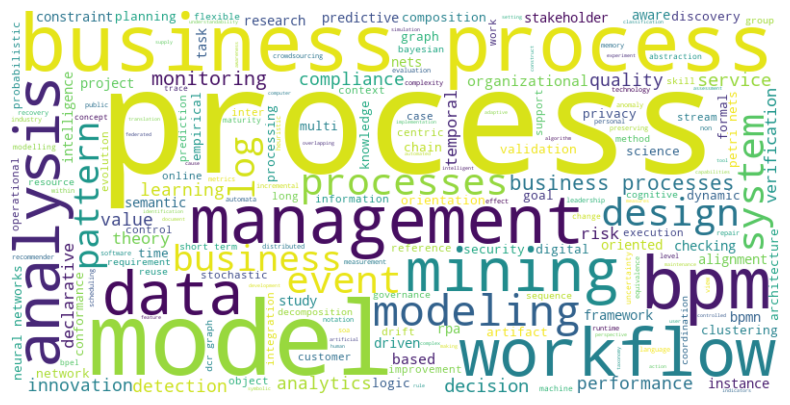

In [254]:
#wordcloud
keywords_c = keyword_frequencies['Keyword']
text_keywords = " ".join(keywords_c)
wordcloud_kw = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(text_keywords)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_kw, interpolation='bilinear')
plt.axis("off")
plt.show()

When analyzing keywords by year, it becomes evident that in earlier years, more specific keywords were prevalent. In contrast, as we approach 2021, we observe a trend towards the use of more general keywords such as "process mining." However, this shift could be attributed to a general increase in the overall prevalence of keywords in articles during this time period.

In [255]:
kw_by_year = []
titles_year = titles.groupby('year')

for year, group in titles_year:
    year_keywords = group['keywords'].str.split(',').explode().str.strip()
    year_keywords = year_keywords.str.replace('\n', ' ', regex=False).str.replace('\t', ' ', regex=False).str.replace('.', '', regex=False)
    year_keywords = year_keywords.str.lower()
    year_keywords = year_keywords.dropna()

    year_keywords = year_keywords.replace({'bpmn 20': 'bpmn 2.0', 'industry 40': 'industry 4.0'})
    year_unique_keywords = year_keywords.unique()
    year_keyword_frequencies = year_keywords.value_counts().reset_index()
    year_keyword_frequencies.columns = ['Keyword', 'Frequency']
    year_keyword_frequencies['Year'] = year
    kw_by_year.append(year_keyword_frequencies)

keyword_frequencies_by_year = pd.concat(kw_by_year, ignore_index=True)
keyword_frequencies_by_year.to_excel('KeywordFrequenciesByYear.xlsx', index=False)
